In [1]:
import pickle
import pandas as pd
import os
import re
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def extract_years(text: str | None) -> int | None:
    """
    Extracts all 4-digit year-like numbers from a given text using regex.

    Args:
        text (str): The input string.

    Returns:
        int: the year of publish
    """
    if text is None:
        return None
    pattern = r"\b\d{4}\b"  # match exactly 4 digits as a whole word
    possibls = re.findall(pattern, text)
    if len(possibls) == 1:
        if int(possibls[0]) <= 2025:
            return int(possibls[0])
    return None

In [3]:
metas = []

with open('/exports/eddie/scratch/s1891075/AIP_NLS_data/embeddings/embedding_list_0.pkl', 'rb') as f:
    data0 = pickle.load(f)
for batch in data0[0]:
    for row in batch[0]:
        metas.append(row)

with open('/exports/eddie/scratch/s1891075/AIP_NLS_data/embeddings/embedding_list_1.pkl', 'rb') as f:
    data0 = pickle.load(f)
for batch in data0[0]:
    for row in batch[0]:
        metas.append(row)

with open('/exports/eddie/scratch/s1891075/AIP_NLS_data/embeddings/embedding_list_2.pkl', 'rb') as f:
    data0 = pickle.load(f)
for batch in data0[0]:
    for row in batch[0]:
        metas.append(row)

with open('/exports/eddie/scratch/s1891075/AIP_NLS_data/embeddings/embedding_list_3.pkl', 'rb') as f:
    data0 = pickle.load(f)
for batch in data0[0]:
    for row in batch[0]:
        metas.append(row)


In [4]:
for meta in tqdm(metas):
    meta['year'] = extract_years(meta['date'])

  0%|          | 0/5091428 [00:00<?, ?it/s]

100%|██████████| 5091428/5091428 [00:04<00:00, 1202506.17it/s]


In [5]:
metas[100]

{'title': "AD1995 : NW Europe's hydrocarbon industry /",
 'creator': 'Geological Society of London.',
 'type': 'text',
 'publisher': 'London : Geological Society,',
 'date': '1996.',
 'language': 'eng',
 'description': 'Includes bibliographic references and index.',
 'subject': 'Natural gas',
 'relation': None,
 'rights': None,
 'identifier': None,
 'coverage': None,
 'format': None,
 'year': 1996}

In [6]:
table = pd.DataFrame(metas)

In [7]:
table = table.astype({'year': 'Int64'})

In [8]:
table

,title,creator,type,publisher,date,language,description,subject,relation,rights,identifier,coverage,format,year
0,"Memoirs of my time, including personal reminis...","Hodder, George.",text,"London,",1870.,eng,None,None,None,None,None,None,None,1870
1,"Life of Allan Cunningham, with selections from...","Hogg, David.",text,"Dumfries,",1875.,eng,None,None,None,None,None,None,None,1875
2,The apostolic fathers.,"Holland, Henry Scott,1847-1918.",text,"London,",1878.,eng,None,None,None,None,None,None,None,1878
3,Home rule and land purchase: their probable ef...,Home Rule.,text,"London,",1886.,eng,None,None,None,None,None,None,None,1886
4,Die Verdienste der Kurfürsten von Sachsen um ...,"Hommel, Rudolph.",text,"Leipzig,",1802.,ger,Uncut.,None,None,None,None,None,None,1802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091423,NORRAG news.,"Northern Policy, Review, Research Advisory Net...",text,"Edinburgh : [NORRAG],",1986-,eng,Description based on: No. 13 (Dec. 1992).,Occupational training,None,None,None,None,None,1986
5091424,Scotland for sea angling.,Scottish Tourist Board.,text,Edinburgh : Scottish Tourist Board,None,eng,Description based on: 1962 ed.,Saltwater fishing,None,None,None,None,None,<NA>
5091425,The Career teacher.,NAS/UWT.,text,"Birmingham : NAS/UWT,",None,eng,Issued by: National Association of Schoolmaste...,Teachers,None,None,None,None,None,<NA>
5091426,Central benefits news.,Welfare Benefits Advisory Service.,text,"Stirling : Welfare Benefits Advisory Service,",1986-,eng,None,Public welfare administration,None,None,None,None,None,1986


In [16]:
table[table.language == 'zxx'].title.tolist()

["Sheila M. Nelson's classical violinist : a superb collection of intermediate pieces for violin and keyboard.",
 'Fareham fair : burlesca bucolica for guitar trio /',
 'Partita : for clarinet, violin and piano /',
 'Piano skills. Piano duets for grades 1-3 : a collection of music in popular and varied styles /',
 'Das "Kitzler-Studienbuch" : Anton Bruckners Studien in harmonie- und instrumentationslehre bei Otto Kitzler (1861-63) /',
 'A little book of hours : for solo piano /',
 'Start playing easiest keyboard /',
 'Serenade a 8 : for 8 wind instruments [in] C minor, K 388 /',
 "L'ombre des arbres... : for orchestra : 2010 /",
 'Journey : violin & piano /',
 'Simplest classic movie blockbusters : for solo piano /',
 'Pastorale : oboe or flute & piano /',
 'Around the world in 80 tunes : a folk fiddle method.',
 'Up-grade! : light relief between grades : flute grades 2- 3 /',
 'Sword of honour [sound recording]',
 'The gathering of the clans collection : pipe music from Nova Scotia ; 

In [9]:
top_10_langs = table.language.value_counts()[:11].index.tolist()
top_10_langs_counts = table.language.value_counts()[:11].tolist()

In [10]:
top_10_lang = [{'language': lang, 'count': count} for lang, count in zip(top_10_langs, top_10_langs_counts) if len(lang.strip()) > 0]

In [11]:
top_10_lang

[{'language': 'eng', 'count': 4171765},
 {'language': 'fre', 'count': 125319},
 {'language': 'ger', 'count': 108951},
 {'language': 'lat', 'count': 62185},
 {'language': 'und', 'count': 47813},
 {'language': 'ita', 'count': 41031},
 {'language': 'rus', 'count': 29834},
 {'language': 'spa', 'count': 27459},
 {'language': 'zxx', 'count': 21256},
 {'language': 'wel', 'count': 16269}]

In [17]:
langcode2lang = {
    'eng': 'English',
    'fre': 'French',
    'ger': 'German',
    'lat': 'Latin',
    'und': 'Undetermined',
    'ita': 'Italian',
    'rus': 'Russian',
    'spa': 'Spanish',
    'zxx': 'No linguistic content',
    'wel': 'Welsh',
}

100%|██████████| 10/10 [00:04<00:00,  2.35it/s]


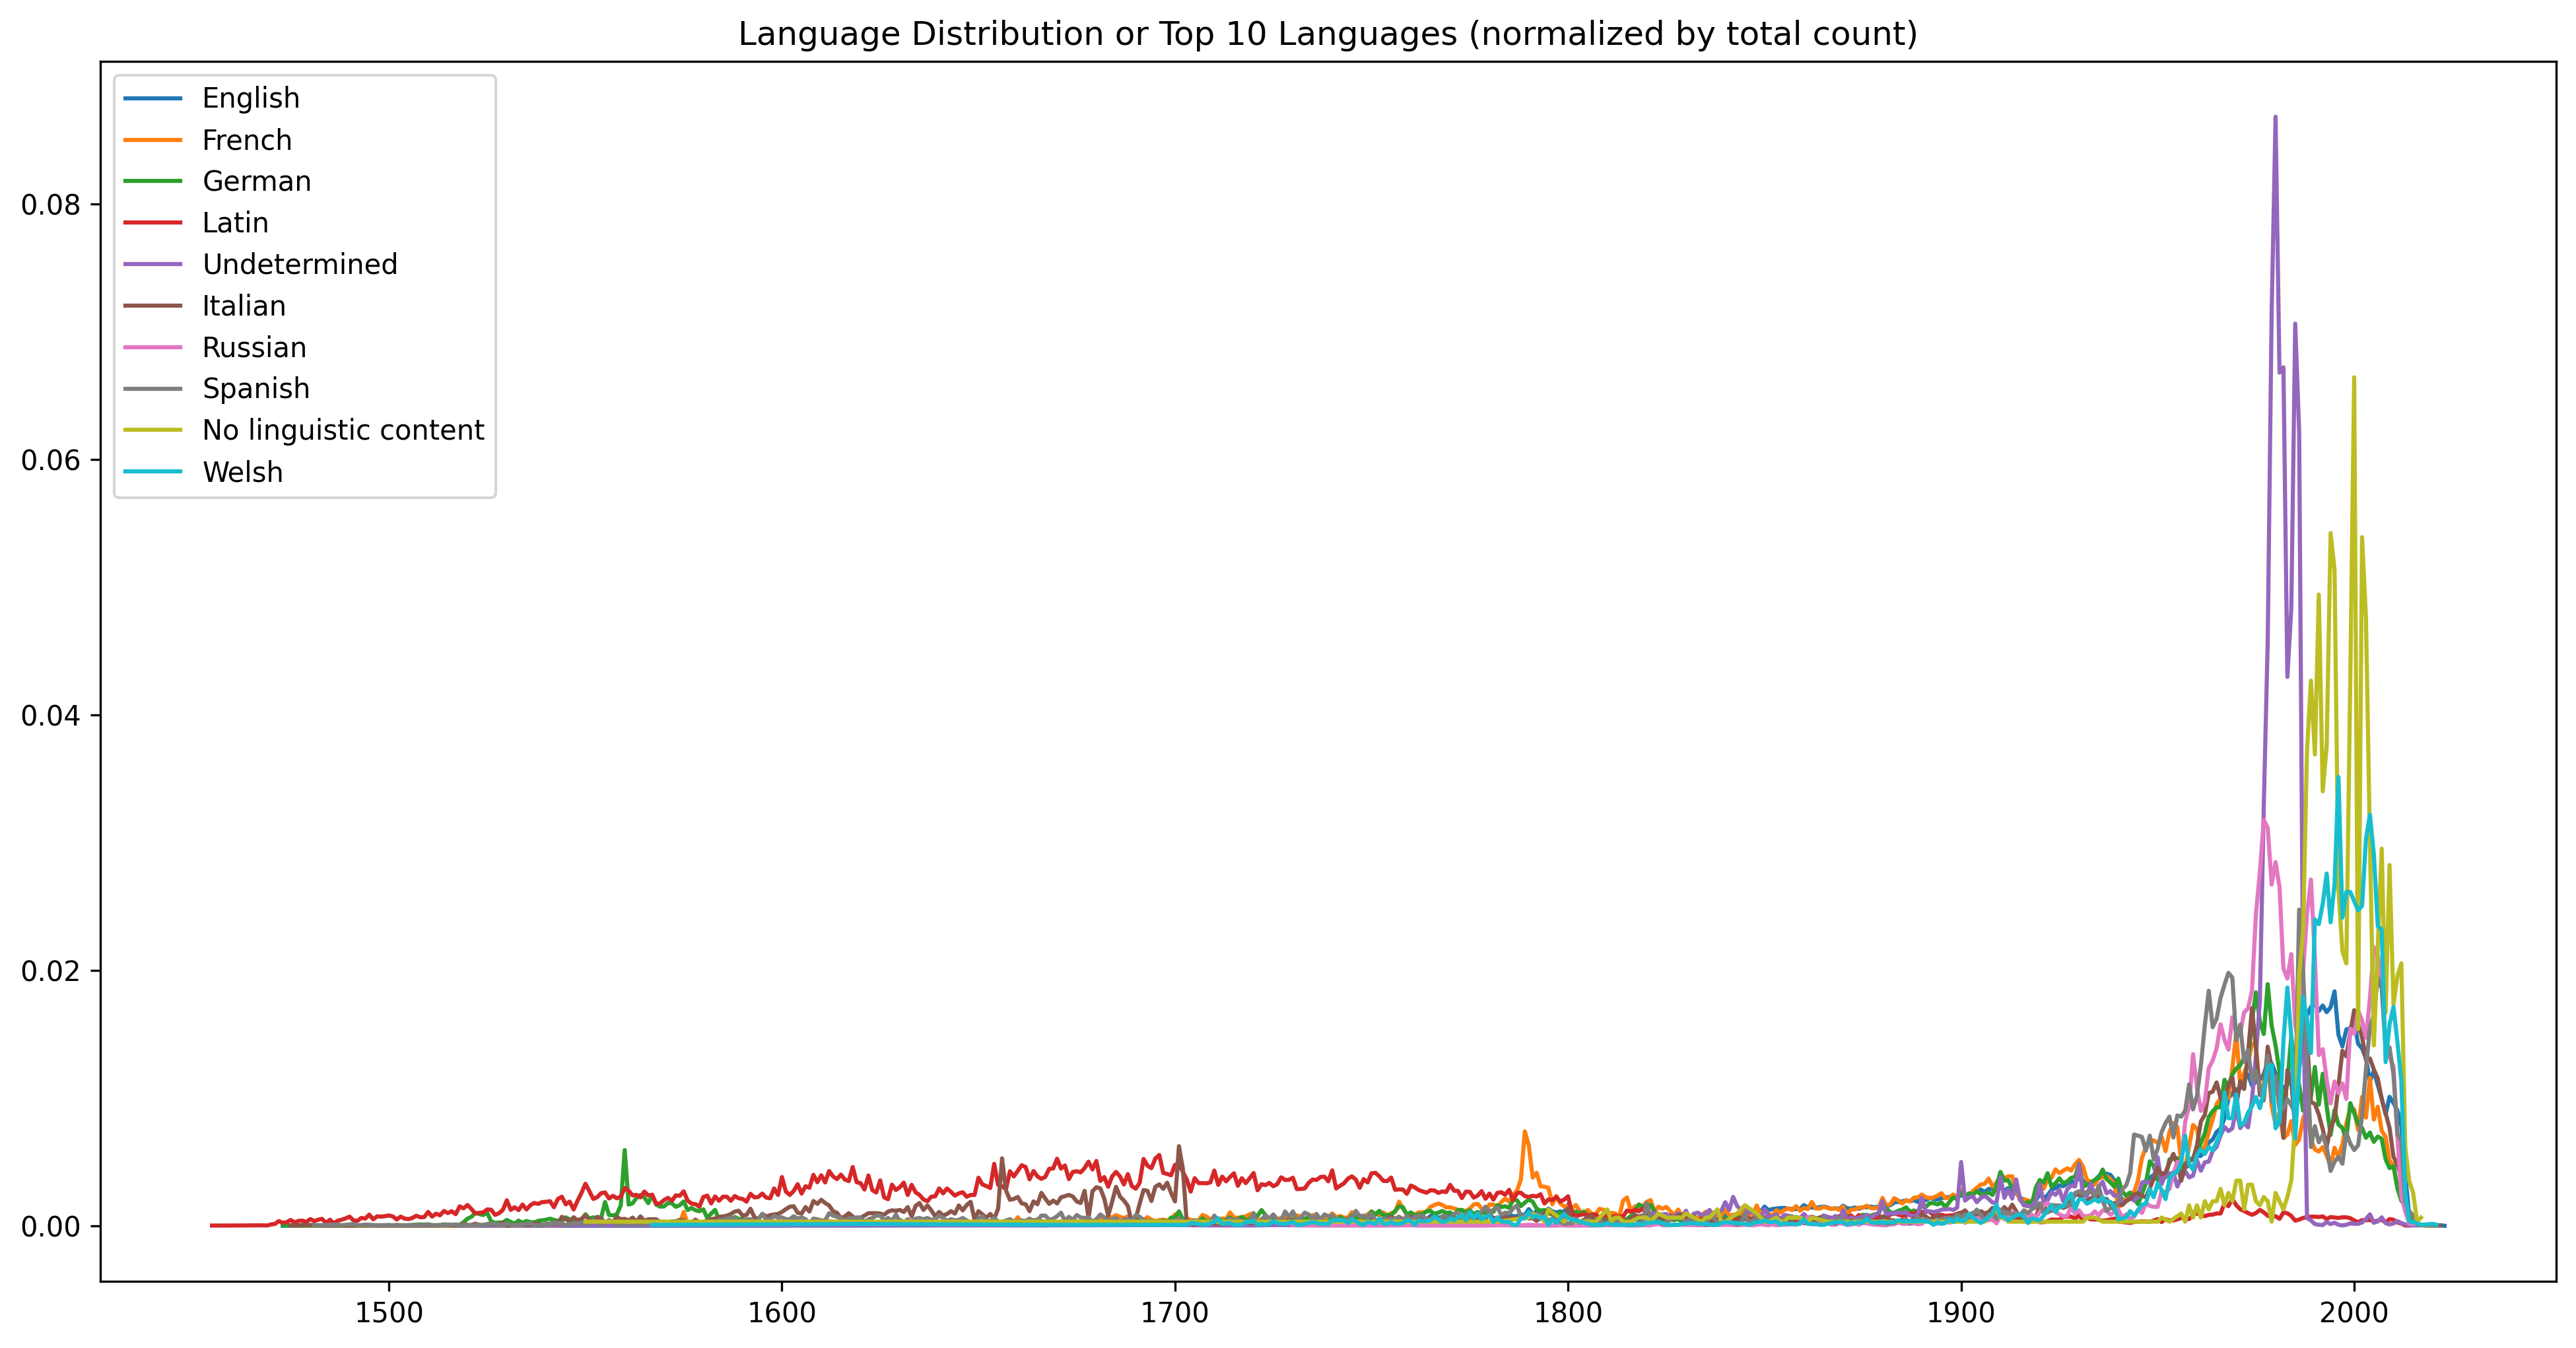

In [19]:
plt.figure(figsize=(16, 8), dpi=300)
plt.title('Language Distribution or Top 10 Languages (normalized by total count)')
for lang in tqdm(top_10_lang):
    lang = lang['language']

    year_series = table[(table.language == lang) & (table.year > 1400)].value_counts('year')


    years = year_series.index.tolist()
    counts = year_series.tolist()
    year_counts = list(zip(years, counts))
    year_counts.sort(key=lambda x: x[0])
    year, counts = zip(*year_counts)
    total = sum(counts)
    ratio = [count / total for count in counts]
    plt.plot(year, ratio, label=langcode2lang[lang])
    plt.legend()
plt.show()

100%|██████████| 10/10 [00:03<00:00,  2.51it/s]


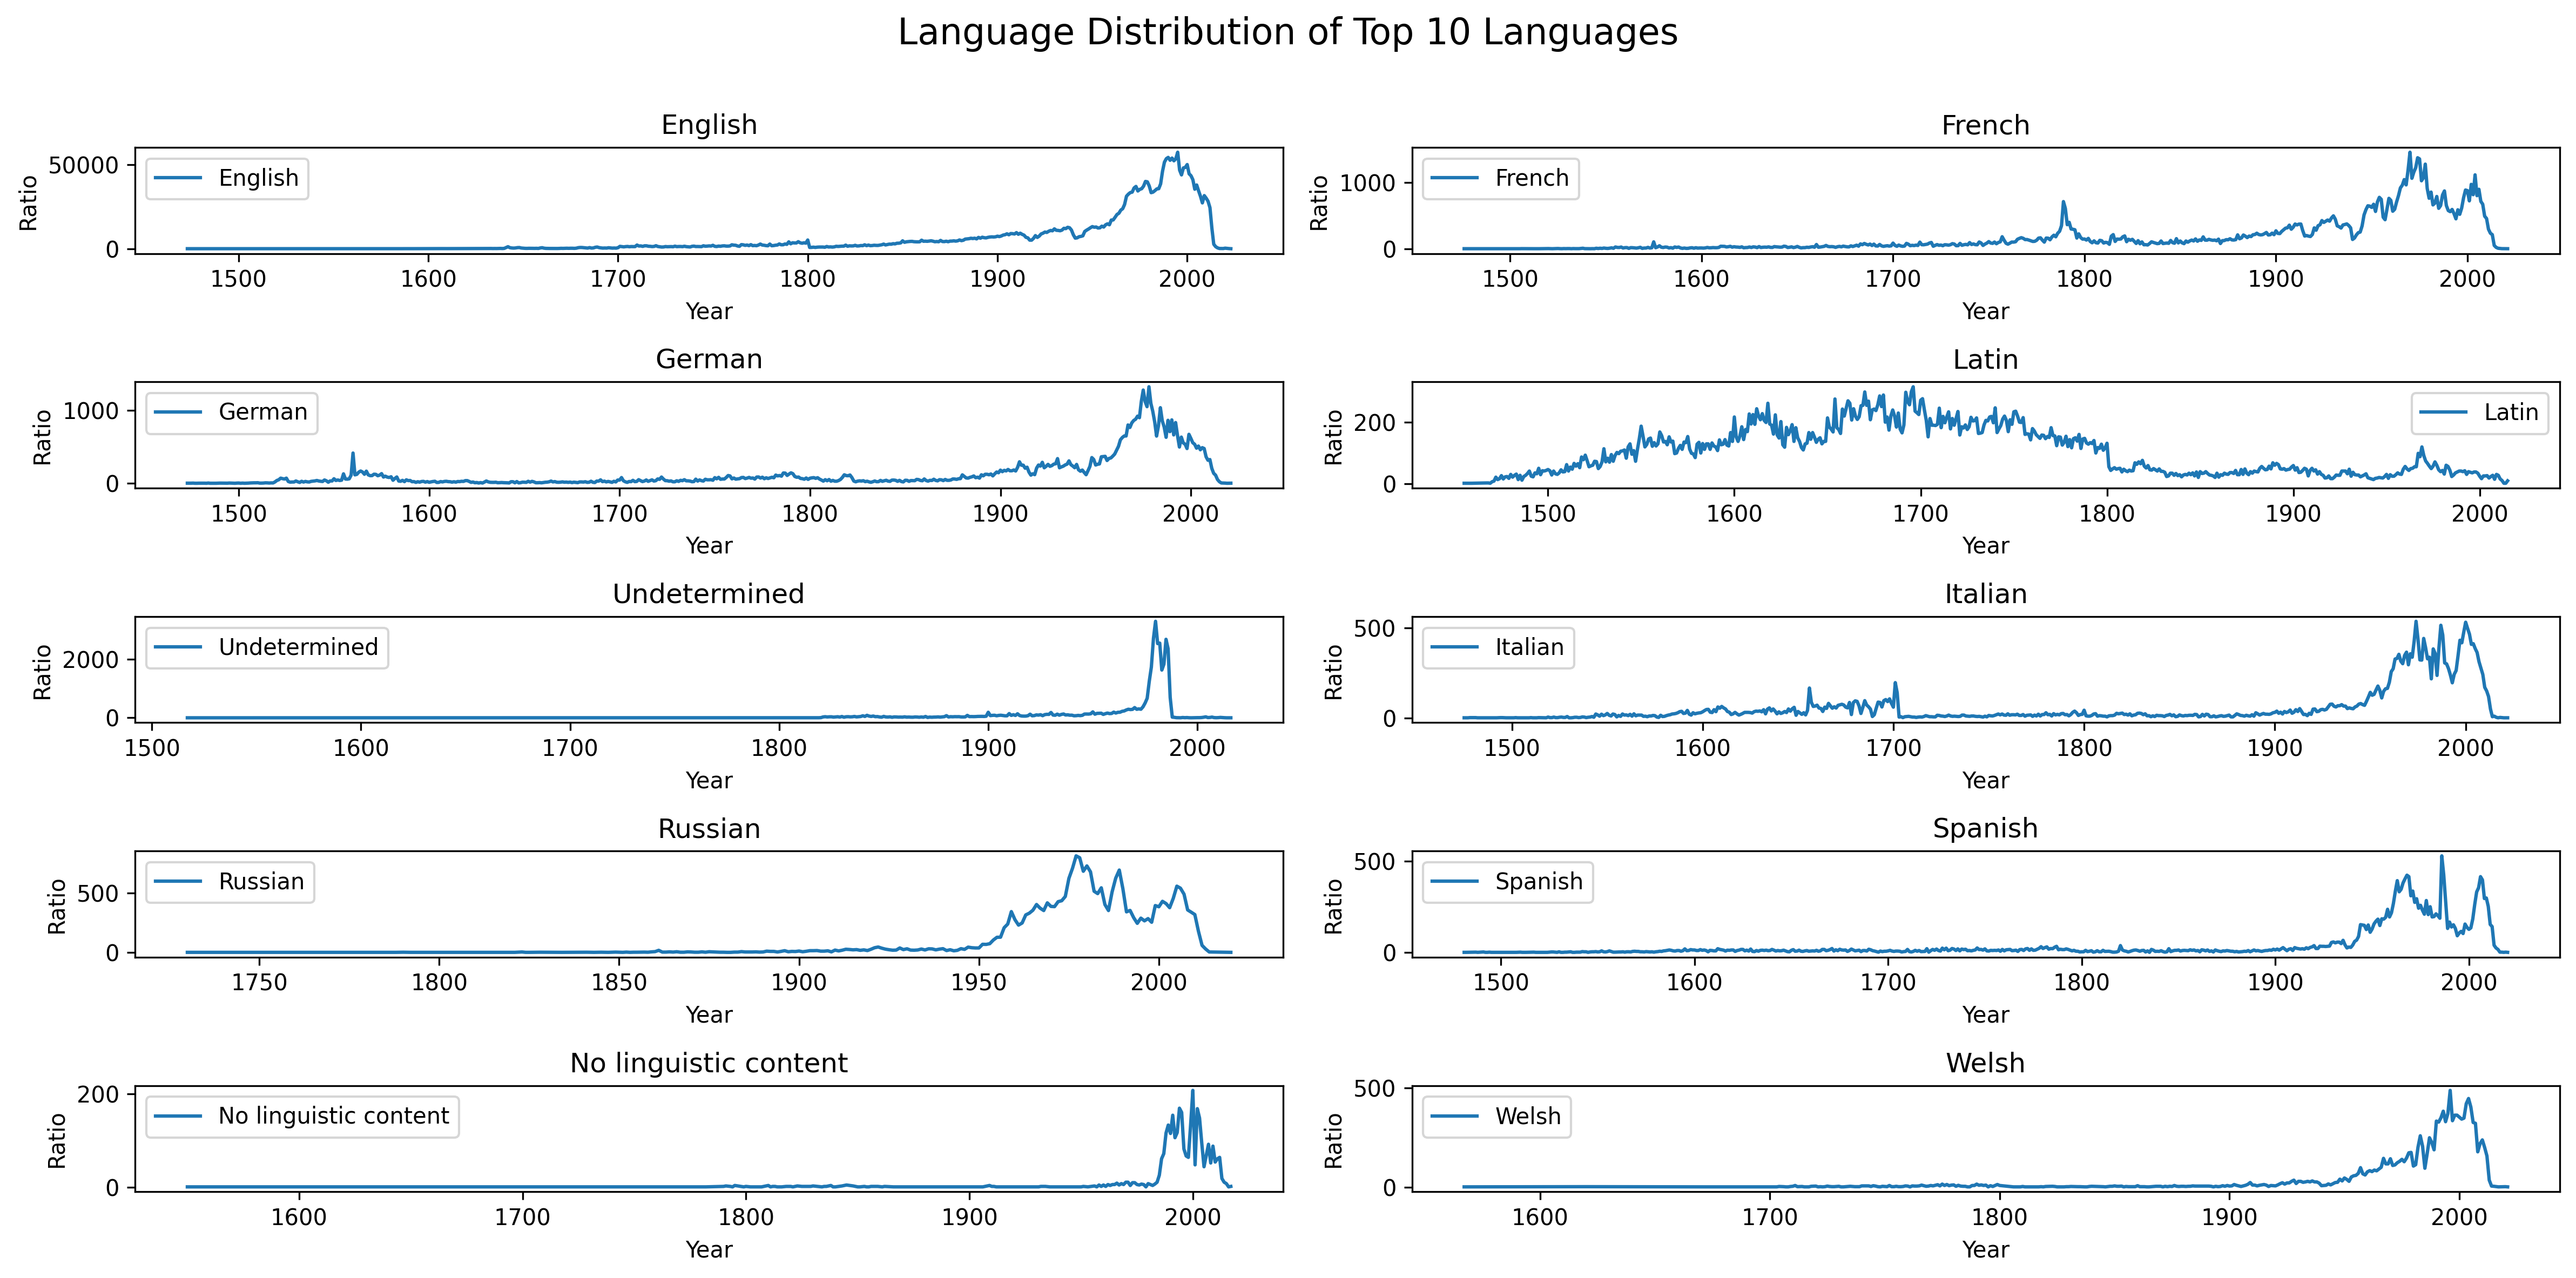

In [24]:
# Create figure and subplots: 5 rows × 2 columns = 10 subplots
fig, axes = plt.subplots(5, 2, figsize=(16, 8), dpi=300)
axes = axes.flatten()  # flatten to make indexing easier

for i, lang_item in enumerate(tqdm(top_10_lang)):
    lang = lang_item['language']
    ax = axes[i]

    # Extract and process data
    year_series = table[(table.language == lang) & (table.year > 1400)].value_counts('year')
    years = year_series.index.tolist()
    counts = year_series.tolist()
    year_counts = sorted(zip(years, counts), key=lambda x: x[0])
    year, counts = zip(*year_counts)

    # Plot on the subplot
    ax.plot(year, counts, label=langcode2lang[lang])
    ax.set_title(langcode2lang[lang])
    ax.set_xlabel('Year')
    ax.set_ylabel('Ratio')
    ax.legend()

# Adjust layout and overall title
fig.suptitle('Language Distribution of Top 10 Languages', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
